<a href="https://colab.research.google.com/github/pathilink/flash_case/blob/main/notebook/flash_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=#FE2B8E>Technical Analytics Case - Flash</font>

## Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

from matplotlib.ticker import FuncFormatter

In [2]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.precision', 2) # decimal
pd.set_option('float_format', '{:.2f}'.format) # scientific notation

## Data

In [3]:
# import the google.colab module
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cards_df = pd.read_csv('/content/drive/MyDrive/test/flash/data_raw/cards.csv')
status_df = pd.read_csv('/content/drive/MyDrive/test/flash/data_raw/cards_status.csv')
transactions_df = pd.read_csv('/content/drive/MyDrive/test/flash/data_raw/cards_transactions.csv')

## EDA

### cards_df

In [5]:
cards_df.sample(5)

,card_number,card_model,company_id,employee_id,valid_thru
200572,597008400,CONTACTLESS,6410a3b851b17d89af5f5662,64137ebc80866d3a335af336,03/25
228031,621326895,CONTACTLESS,6466979292a92c633aa644f3,64678a579dd9b0cb9d33344e,05/25
262073,270228450,CONTACTLESS,62a0ee483d3be530411769ec,632ca977ca63c02c5f9a557d,06/24
27441,646776195,CONTACTLESS,64aef99a8df3e88a1a12bd5e,64c1a41f3a43722ade9b528d,07/25
56266,203625720,PIN,611c0cfae616140009dd056a,61892139e4334000099bc2b1,10/23


In [6]:
print(f'cards_df has {cards_df.shape[0]} rows and {cards_df.shape[1]} columns.')

cards_df has 288093 rows and 5 columns.


In [7]:
cards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288093 entries, 0 to 288092
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   card_number  288093 non-null  int64 
 1   card_model   288093 non-null  object
 2   company_id   287987 non-null  object
 3   employee_id  288018 non-null  object
 4   valid_thru   288093 non-null  object
dtypes: int64(1), object(4)
memory usage: 11.0+ MB


In [8]:
# missing data
total = cards_df.isnull().sum().sort_values(ascending=False)
percent = (cards_df.isnull().sum()/cards_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])
missing_data.query('Total > 0')

,Total,Percentage
company_id,106,0.00
employee_id,75,0.00


In [9]:
# unique values
cards_df['card_model'].unique()

array(['PIN', 'CONTACTLESS'], dtype=object)

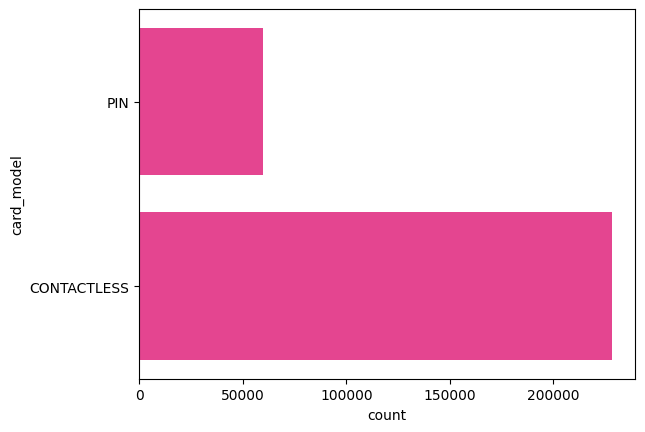

In [10]:
# card model distribution
sns.countplot(data=cards_df, y='card_model', color='#FE2B8E')

plt.show()

In [11]:
# card distribution by company_id
cards_df.groupby(['company_id','card_model'])['card_number'].count().reset_index().sort_values(by='card_number', ascending=False)


,company_id,card_model,card_number
7846,613bb466a9517c00099d37c2,CONTACTLESS,1469
13003,622a549c256d4b7922337eeb,CONTACTLESS,1464
10365,61b89cf2c3868a4e89c654fc,CONTACTLESS,1041
13075,622f86082d1718b02e8efd3f,CONTACTLESS,995
12431,6213c84acab8cf0bf2d4e87b,CONTACTLESS,875
...,...,...,...
11917,6203b853f09840a353a046a1,PIN,1
22755,63ea49ab26f5c45ebe18b4e4,CONTACTLESS,1
22754,63ea429d6f7cb79cd6149cec,CONTACTLESS,1
22751,63ea26ecd6571fc568f7b04b,CONTACTLESS,1


In [12]:
# change card_number type
cards_df['card_number'] = cards_df['card_number'].astype(str)
type(cards_df['card_number'][0])

str

In [13]:
# change format
cards_df['valid_thru'] = cards_df['valid_thru'].apply(lambda x: f'01-{x.replace("/", "-20")}')

# change type
cards_df['valid_thru'] = pd.to_datetime(cards_df['valid_thru'], format='%d-%m-%Y')

cards_df['valid_thru'].head()


,valid_thru
0,2023-01-01
1,2023-01-01
2,2023-01-01
3,2023-01-01
4,2023-01-01


In [14]:
# min & max: dates
print(f"Minimum valid date: {cards_df['valid_thru'].min()}")
print(f"Maximum valid date: {cards_df['valid_thru'].max()}")

Minimum valid date: 2021-04-01 00:00:00
Maximum valid date: 2025-09-01 00:00:00


In [15]:
# quarter column
cards_df['period'] = 'Q' + (cards_df['valid_thru'].dt.quarter.astype(str)) + '-' + cards_df['valid_thru'].dt.year.astype(str)
cards_df[['valid_thru', 'period']].sample(5)

,valid_thru,period
114931,2024-06-01,Q2-2024
17652,2024-03-01,Q1-2024
256774,2025-08-01,Q3-2025
266912,2025-03-01,Q1-2025
4610,2024-05-01,Q2-2024


In [16]:
cards_df.columns

Index(['card_number', 'card_model', 'company_id', 'employee_id', 'valid_thru',
       'period'],
      dtype='object')

### status_df

In [17]:
status_df.sample(5)

,card_number,card_model,card_type,card_status,started_at,ended_at
396712,648004410,CONTACTLESS,PLASTIC,OPEN,2023-07-26,NaN
298961,306061005,CONTACTLESS,PLASTIC,OPEN,2023-07-27,2023-08-02
366714,230551755,CONTACTLESS,PLASTIC,OPEN,2023-10-02,NaN
322680,179275800,PIN,PLASTIC,OPEN,2022-07-14,NaN
217250,285993975,CONTACTLESS,PLASTIC,OPEN,2022-12-16,NaN


In [18]:
print(f'status_df has {status_df.shape[0]} rows and {status_df.shape[1]} columns.')

status_df has 498219 rows and 6 columns.


In [19]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498219 entries, 0 to 498218
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   card_number  498219 non-null  int64 
 1   card_model   498219 non-null  object
 2   card_type    498219 non-null  object
 3   card_status  498219 non-null  object
 4   started_at   498219 non-null  object
 5   ended_at     210126 non-null  object
dtypes: int64(1), object(5)
memory usage: 22.8+ MB


In [20]:
status_df['card_model'].unique()

array(['PIN', 'CONTACTLESS'], dtype=object)

In [21]:
status_df['card_type'].unique()

array(['PLASTIC'], dtype=object)

In [22]:
# drop column
status_df = status_df.drop('card_type', axis=1)
status_df.columns

Index(['card_number', 'card_model', 'card_status', 'started_at', 'ended_at'], dtype='object')

In [23]:
status_df['card_status'].unique()

array(['OPEN', 'PERMANENTLY_TERMINATED', 'TEMPORARILY_BLOCKED'],
      dtype=object)

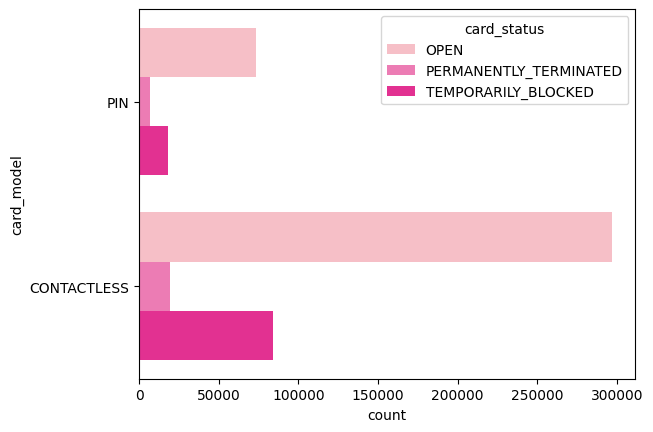

In [24]:
# card_model x card_status: is it related?
pink_palette = sns.color_palette(["#FFB6C1", "#FF69B4", "#FF1493"])

sns.countplot(data=status_df, y='card_model', hue='card_status', palette=pink_palette);

In [25]:
# change dates type

status_df['started_at'] = pd.to_datetime(status_df['started_at'])
status_df['ended_at'] = pd.to_datetime(status_df['ended_at'])
status_df['started_at'].head()

,started_at
0,2022-07-25
1,2022-05-02
2,2022-05-27
3,2023-03-03
4,2022-12-14


In [26]:
status_df['ended_at'].sample(5)

,ended_at
99270,2023-02-14
434146,NaT
30391,NaT
280906,2023-02-16
424281,2023-07-02


In [27]:
# min & max: dates
print(f"Minimum start date: {status_df['started_at'].min()}")
print(f"Maximum start date: {status_df['started_at'].max()}")

print(f"Minimum end date: {status_df['ended_at'].min()}")
print(f"Maximum end date: {status_df['ended_at'].max()}")

Minimum start date: 2022-02-28 00:00:00
Maximum start date: 2023-10-11 00:00:00
Minimum end date: 2022-08-06 00:00:00
Maximum end date: 2023-10-11 00:00:00


In [28]:
# quarter column
status_df['period_started_at'] = 'Q' + (status_df['started_at'].dt.quarter.astype(str)) + '-' + status_df['started_at'].dt.year.astype(str)
status_df[['started_at', 'period_started_at']].sample(5)

,started_at,period_started_at
38524,2023-10-03,Q4-2023
75948,2023-09-11,Q3-2023
481358,2022-12-01,Q4-2022
158615,2023-08-31,Q3-2023
168185,2023-08-02,Q3-2023


In [29]:
status_df['period_ended_at'] = (
    'Q' + status_df['ended_at'].dt.quarter.fillna(0).astype(int).astype(str) + '-' +
    status_df['ended_at'].dt.year.fillna(0).astype(int).astype(str)
).where(status_df['ended_at'].notna(), other=None)

status_df[['ended_at', 'period_ended_at']].sample(5)

,ended_at,period_ended_at
157342,NaT,None
63966,NaT,None
210307,NaT,None
344738,2023-03-10,Q1-2023
173467,NaT,None


In [30]:
type(status_df['period_ended_at'][27460])

str

In [31]:
status_df.columns

Index(['card_number', 'card_model', 'card_status', 'started_at', 'ended_at',
       'period_started_at', 'period_ended_at'],
      dtype='object')

### transactions_df

In [32]:
transactions_df.sample(5)

,card_number,transaction_id,transaction_date,amount
12697694,309258195.00,jwisT6FJyxIJxREAaXA6J,2023-05-27T15:40:00.000Z,55.00
7145052,525934590.00,HOkM5t4lp6UhgRq98pk5V,2023-02-19T11:05:11.000Z,23.01
12054078,235806150.00,0H5oJRdAaKJGIO4HoCNG8,2023-05-08T11:11:59.000Z,19.52
7255499,620398410.00,yzhFfFfXIAP7CIN0mQUv-,2023-07-10T12:47:42.000Z,27.62
1173042,255235290.00,W4TwWZ1GmuKwOaAG6_tYz,2023-03-14T21:07:10.000Z,12.60


In [33]:
print(f'transactions_df has {transactions_df.shape[0]} rows and {transactions_df.shape[1]} columns.')

transactions_df has 13979889 rows and 4 columns.


In [34]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979889 entries, 0 to 13979888
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   card_number       float64
 1   transaction_id    object 
 2   transaction_date  object 
 3   amount            float64
dtypes: float64(2), object(2)
memory usage: 426.6+ MB


In [35]:
# missing data
total = transactions_df.isnull().sum().sort_values(ascending=False)
percent = (transactions_df.isnull().sum()/transactions_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])
missing_data#.query('Total > 0')

,Total,Percentage
card_number,0,0.00
transaction_id,0,0.00
transaction_date,0,0.00
amount,0,0.00


In [36]:
# change card_number type
transactions_df['card_number'] = transactions_df['card_number'].astype(str).str.replace('.0', '', regex=False)
type(transactions_df['card_number'][0])

str

In [37]:
# change date type
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])
transactions_df['transaction_date'].dtypes

datetime64[ns, UTC]

In [38]:
# min & max: dates
print(f"Minimum date: {transactions_df['transaction_date'].min()}")
print(f"Maximum date: {transactions_df['transaction_date'].max()}")

Minimum date: 2022-06-02 13:05:56+00:00
Maximum date: 2023-10-20 06:54:54+00:00


In [39]:
# quarter column
transactions_df['period'] = 'Q' + (transactions_df['transaction_date'].dt.quarter.astype(str)) + '-' + transactions_df['transaction_date'].dt.year.astype(str)
transactions_df[['transaction_date', 'period']].sample(5)

,transaction_date,period
11163206,2023-08-03 09:08:49+00:00,Q3-2023
8007049,2023-09-04 21:07:36+00:00,Q3-2023
7582734,2023-07-29 15:02:39+00:00,Q3-2023
8106383,2023-07-13 19:13:16+00:00,Q3-2023
349200,2023-07-15 20:38:22+00:00,Q3-2023


In [40]:
transactions_df['period'].unique()

array(['Q1-2023', 'Q2-2023', 'Q3-2023', 'Q4-2023', 'Q3-2022', 'Q4-2022',
       'Q2-2022'], dtype=object)

In [41]:
transactions_df.columns

Index(['card_number', 'transaction_id', 'transaction_date', 'amount',
       'period'],
      dtype='object')

## Questions

In [42]:
def cumulative_quarter(status, quarters):
  count_df = (
  status_df.query("card_status in @status")                   # filter
  .set_index('started_at')                                    # define started as DatetimeIndex
  .resample('QE')['card_number'].nunique().reset_index()      # groupby & count
  )

  # accumulated soma
  count_df['total_cards_until'] = count_df['card_number'].cumsum()

  # rename columns
  count_df.rename(columns={'started_at': 'quarter', 'card_number': 'card_count'}, inplace=True)

  # cumulative total up to the specific dates
  dates = pd.to_datetime(quarters)

  # cumulative total
  totals = {
      'date': [],
      'total_cards_until': []
  }

  for date in dates:
      total_until = count_df[count_df['quarter'] <= date]['card_count'].sum()
      totals['date'].append(date)
      totals['total_cards_until'].append(total_until)


  result_df = pd.DataFrame(totals)
  return result_df

In [43]:
def count_quarter(status, quarters):
  count_df = (
  status_df.query("card_status in @status")                   # filter
  .set_index('started_at')                                    # define started as DatetimeIndex
  .resample('QE')['card_number'].nunique().reset_index()      # groupby & count
  )

  count_df = count_df[count_df['started_at'].isin(pd.to_datetime(quarters))]

  return count_df

In [44]:
def one_transaction(df, quarters):
  trans_df = df.groupby(df['period'])['card_number'].nunique().reset_index()
  trans_df =  trans_df[trans_df['period'].isin(quarters)]
  return trans_df

### 1.1 Cards at beginning of quarter

In [45]:
# Total
lista_quarters = ['2022-12-31', '2023-03-31', '2023-06-30']
status = ['OPEN', 'TEMPORARILY_BLOCKED']

cumulative_quarter(status, lista_quarters)

,date,total_cards_until
0,2022-12-31,160915
1,2023-03-31,205315
2,2023-06-30,260079


In [46]:
# Open
lista_quarters = ['2022-12-31', '2023-03-31', '2023-06-30']
status = ['OPEN']

cumulative_quarter(status, lista_quarters)

,date,total_cards_until
0,2022-12-31,160523
1,2023-03-31,201691
2,2023-06-30,253041


In [47]:
# Temporarily
lista_quarters = ['2022-12-31', '2023-03-31', '2023-06-30']
status = ['TEMPORARILY_BLOCKED']

cumulative_quarter(status, lista_quarters)

,date,total_cards_until
0,2022-12-31,2153
1,2023-03-31,17178
2,2023-06-30,32380


### 1.2 New cards obtained during quarter

In [48]:
lista_quarters = ['2023-03-31', '2023-06-30', '2023-09-30']
status = ['OPEN', 'TEMPORARILY_BLOCKED']

count_quarter(status, lista_quarters)

,started_at,card_number
4,2023-03-31,44400
5,2023-06-30,54764
6,2023-09-30,62649


### 1.3 Cards terminated during quarter

In [49]:
lista_quarters = ['2023-03-31', '2023-06-30', '2023-09-30']
status = ['PERMANENTLY_TERMINATED']

count_quarter(status, lista_quarters)

,started_at,card_number
2,2023-03-31,4686
3,2023-06-30,8687
4,2023-09-30,11061


### 1.4 Cards at end of quarter

In [50]:
# Total
lista_quarters = ['2023-03-31', '2023-06-30', '2023-09-30']
status = ['OPEN', 'TEMPORARILY_BLOCKED']

cumulative_quarter(status, lista_quarters)

,date,total_cards_until
0,2023-03-31,205315
1,2023-06-30,260079
2,2023-09-30,322728


In [51]:
# Open
lista_quarters = ['2023-03-31', '2023-06-30', '2023-09-30']
status = ['OPEN']

cumulative_quarter(status, lista_quarters)

,date,total_cards_until
0,2023-03-31,201691
1,2023-06-30,253041
2,2023-09-30,311865


In [52]:
# Temporarily
lista_quarters = ['2023-03-31', '2023-06-30', '2023-09-30']
status = ['TEMPORARILY_BLOCKED']

cumulative_quarter(status, lista_quarters)

,date,total_cards_until
0,2023-03-31,17178
1,2023-06-30,32380
2,2023-09-30,51033


### 1.5 Cards with at least one transaction during quarter

In [53]:
list_quarters = ['Q1-2023', 'Q2-2023', 'Q3-2023']

one_transaction(transactions_df, list_quarters)

,period,card_number
0,Q1-2023,128113
2,Q2-2023,155331
4,Q3-2023,174052


### 2.1 Percentage of contactless cards out of the total number of cards at the end of Q3-2023.

In [54]:
q2_1 = status_df.query("(card_status == 'OPEN' | card_status == 'TEMPORARILY_BLOCKED') & \
                              started_at <= '2023-09-30' \
                            ")
q2_1.sample(5)

,card_number,card_model,card_status,started_at,ended_at,period_started_at,period_ended_at
63058,553293120,CONTACTLESS,TEMPORARILY_BLOCKED,2023-05-06,2023-05-08,Q2-2023,Q2-2023
355206,631736730,CONTACTLESS,OPEN,2023-06-28,NaT,Q2-2023,None
228551,594104745,CONTACTLESS,TEMPORARILY_BLOCKED,2023-03-09,2023-03-10,Q1-2023,Q1-2023
429688,605150055,CONTACTLESS,OPEN,2023-05-26,NaT,Q2-2023,None
78168,667300530,CONTACTLESS,OPEN,2023-09-21,NaT,Q3-2023,None


In [55]:
# calculating 'card_model' percentual
percentual = q2_1['card_model'].value_counts(normalize=True) * 100

# df
percentual_df = percentual.reset_index().round()
percentual_df.columns = ['card_model', 'percentual']

percentual_df

,card_model,percentual
0,CONTACTLESS,80.00
1,PIN,20.00


### 2.2 Strategies to increase the contactless card rate by the end of Q4-2023.

In [56]:
sort_periods = ['Q1-2023', 'Q2-2023', 'Q3-2023', 'Q4-2023',
                  'Q1-2024', 'Q2-2024', 'Q3-2024', 'Q4-2024',
                  'Q1-2025', 'Q2-2025', 'Q3-2025']

q2_2 = cards_df.query("period in @sort_periods") \
                      .groupby(['period', 'card_model'])['card_number'].count() \
                      .reset_index()

q2_2['period_order'] = q2_2['period'].apply(lambda x: sort_periods.index(x))

q2_2 = q2_2.sort_values(by='period_order').drop(columns='period_order')

q2_2

,period,card_model,card_number
0,Q1-2023,PIN,5989
4,Q2-2023,PIN,9363
8,Q3-2023,PIN,10104
11,Q4-2023,PIN,25267
1,Q1-2024,CONTACTLESS,29031
2,Q1-2024,PIN,2
5,Q2-2024,CONTACTLESS,51982
6,Q2-2024,PIN,5
9,Q3-2024,CONTACTLESS,16182
12,Q4-2024,CONTACTLESS,32782


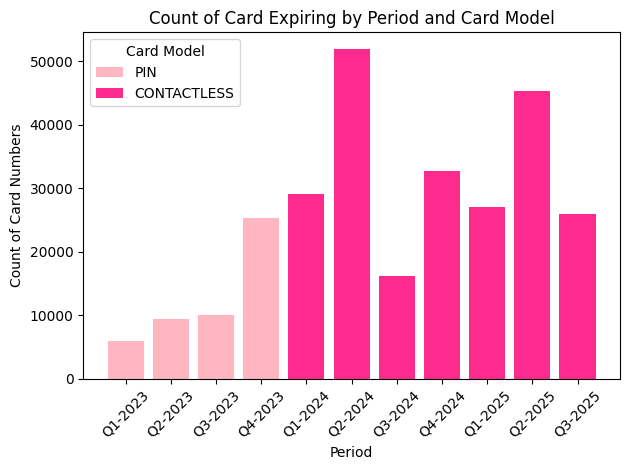

In [57]:
colors = ['#FFB6C1', '#FE2B8E']  # 'PIN', 'CONTACTLESS'

for model in q2_2['card_model'].unique():
    subset = q2_2[q2_2['card_model'] == model]
    plt.bar(subset['period'], subset['card_number'], label=model, color=colors.pop(0))

plt.xlabel('Period')
plt.ylabel('Count of Card Numbers')
plt.title('Count of Card Expiring by Period and Card Model')
plt.xticks(rotation=45)
plt.legend(title='Card Model')
plt.tight_layout()

plt.show()

🎯 Stop issuing PIN cards.

🎯 Almost 100% of PIN cards will expire by the end of Q4-2023. It will be possible to eliminate PIN cards by not issuing new cards in this model and encouraging the switch to CONTACTLESS.

### 3.1 How to improve card activation and use

In [58]:
# new df
q3_1 = status_df.query("card_status == 'TEMPORARILY_BLOCKED'").copy()

# differency between ended_at and started_at in days
q3_1.loc[:,'duration'] = (q3_1['ended_at'] - q3_1['started_at']).dt.days

# card_abandoned: >= 90 days with status 'TEMPORARILY_BLOCKED'
q3_1.loc[:,'card_abandoned'] = np.where(q3_1['duration'] >= 90, '1', '0')
q3_1.sample(5)

,card_number,card_model,card_status,started_at,ended_at,period_started_at,period_ended_at,duration,card_abandoned
202644,181917615,PIN,TEMPORARILY_BLOCKED,2023-07-28,2023-07-31,Q3-2023,Q3-2023,3.00,0
311343,604663830,CONTACTLESS,TEMPORARILY_BLOCKED,2023-09-01,2023-09-01,Q3-2023,Q3-2023,0.00,0
213497,268738155,CONTACTLESS,TEMPORARILY_BLOCKED,2022-12-23,2022-12-23,Q4-2022,Q4-2022,0.00,0
11414,256373940,CONTACTLESS,TEMPORARILY_BLOCKED,2023-06-10,2023-06-10,Q2-2023,Q2-2023,0.00,0
392446,617972655,CONTACTLESS,TEMPORARILY_BLOCKED,2023-09-02,2023-09-03,Q3-2023,Q3-2023,1.00,0


In [59]:
sort_periods = ['Q3-2022', 'Q4-2022',
                'Q1-2023', 'Q2-2023', 'Q3-2023', 'Q4-2023']

q3_1 = q3_1.query("period_started_at in @sort_periods") \
                      .groupby(['period_started_at', 'card_abandoned'])['card_number'].count() \
                      .reset_index()

q3_1['period_order'] = q3_1['period_started_at'].apply(lambda x: sort_periods.index(x))

q3_1 = q3_1.sort_values(by='period_order').drop(columns='period_order')

q3_1.sample(5)

,period_started_at,card_abandoned,card_number
3,Q2-2023,1,47
0,Q1-2023,0,28436
6,Q4-2022,0,2960
5,Q3-2023,0,36128
2,Q2-2023,0,27312


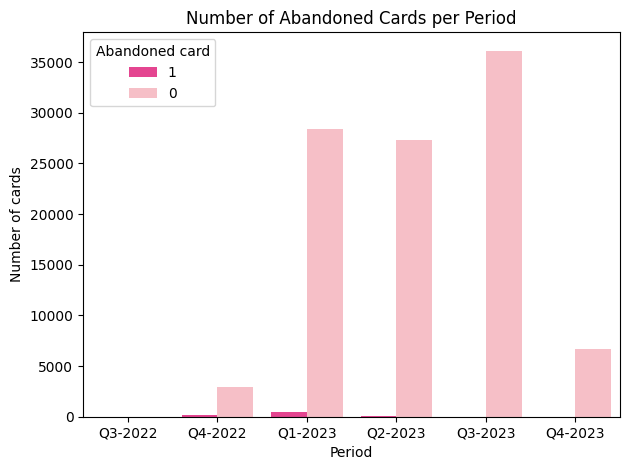

In [60]:
colors = ['#FE2B8E', '#FFB6C1']

sns.barplot(data=q3_1, x='period_started_at', y='card_number', hue='card_abandoned', palette=colors)
plt.title('Number of Abandoned Cards per Period')
plt.xlabel('Period')
plt.ylabel('Number of cards')
plt.legend(title='Abandoned card')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

💡 Few cards go 90 days or more (a quarter) without being reactivated.

🎯 To combat abandonment, we can talk to customers to understand what success means to them and whether they are achieving this with the product. CSAT and NPS surveys can help in this process.

### 3.2 ‘temporarily blocked’: direct impacts on the operation and recommendations for dealing with this situation

🤔 If a high rate of TEMPORARILY_BLOCKED cards were noticed, the first obvious impact would be on the number of transactions because these cards would not be enabled for this.

My recommendations would be:

* Identify the reasons for the blocking;
* Review the reactivation process to see if there are any blockages;
* Carry out qualitative research with users;

In the graph below you can see the projection of transactions considering temporarily blocked cards, as if they weren't blocked, and the total number of open card transactions.

In [61]:
# total transactions per card
count_transactions = transactions_df.groupby(['card_number', 'period'])['transaction_id'].count().reset_index()
count_transactions.sample(5)

,card_number,period,transaction_id
356768,551650200,Q1-2023,9
457760,591220395,Q4-2023,17
81949,231459825,Q1-2023,12
69316,222528525,Q3-2023,55
591021,641395440,Q3-2023,18


In [62]:
# average transactions
avg_transaction = round(count_transactions['transaction_id'].mean())
avg_transaction

22

In [63]:
# cards temporarily blocked within the same quarter - except abandoned
q3_2 = status_df.query("card_status == 'TEMPORARILY_BLOCKED' & \
                        period_started_at == period_ended_at") \
                     [['card_number', 'period_started_at']]
q3_2.sample(5)

,card_number,period_started_at
330867,248692260,Q2-2023
288849,237090900,Q1-2023
257141,284515665,Q1-2023
52451,261864735,Q1-2023
83478,200446710,Q2-2023


In [64]:
# assigning the average to cards
q3_2 = q3_2.rename(columns={'period_started_at': 'period'})
q3_2['total_transactions'] = avg_transaction
q3_2['temporarily_blocked'] = 'Yes'
q3_2.sample(5)

,card_number,period,total_transactions,temporarily_blocked
441735,191098140,Q2-2023,22,Yes
233088,619700310,Q3-2023,22,Yes
216523,282784395,Q2-2023,22,Yes
337205,285434145,Q2-2023,22,Yes
390329,605157600,Q3-2023,22,Yes


In [65]:
# average number of transactions per card and period
q3_2_trans = count_transactions.rename(columns={'transaction_id': 'total_transactions'})
q3_2_trans['temporarily_blocked'] = 'No'
q3_2_trans.sample(5)

,card_number,period,total_transactions,temporarily_blocked
355738,551416560,Q2-2023,38,No
236149,291612255,Q3-2023,24,No
74414,224731650,Q3-2023,22,No
53607,211905075,Q2-2023,18,No
53425,211804095,Q4-2023,4,No


In [66]:
q3_2_concat = pd.concat([q3_2_trans, q3_2])
q3_2_concat.sample(5)

,card_number,period,total_transactions,temporarily_blocked
143586,555688665,Q2-2023,22,Yes
491922,601525785,Q3-2023,17,No
178076,306284760,Q3-2023,22,Yes
50097,210133980,Q4-2023,1,No
110775,242085120,Q3-2023,102,No


In [67]:
sort_periods = ['Q2-2022', 'Q3-2022', 'Q4-2022',
                'Q1-2023', 'Q2-2023', 'Q3-2023', 'Q4-2023']

# total transaction by card_number
total_concat = q3_2_concat.groupby('period')['total_transactions'].sum().reset_index()

total_concat['period_order'] = total_concat['period'].apply(lambda x: sort_periods.index(x))

total_concat = total_concat.sort_values(by='period_order').drop(columns='period_order')
total_concat

,period,total_transactions
1,Q2-2022,590
3,Q3-2022,142590
5,Q4-2022,685414
0,Q1-2023,2957128
2,Q2-2023,5023501
4,Q3-2023,5899127
6,Q4-2023,1298333


In [68]:
sort_periods = ['Q2-2022', 'Q3-2022', 'Q4-2022',
                'Q1-2023', 'Q2-2023', 'Q3-2023', 'Q4-2023']

# total transaction by card_number
total_open = q3_2_trans.groupby('period')['total_transactions'].sum().reset_index()

total_open['period_order'] = total_open['period'].apply(lambda x: sort_periods.index(x))

total_open = total_open.sort_values(by='period_order').drop(columns='period_order')
total_open

,period,total_transactions
1,Q2-2022,590
3,Q3-2022,142590
5,Q4-2022,642976
0,Q1-2023,2423210
2,Q2-2023,4447453
4,Q3-2023,5142261
6,Q4-2023,1180809


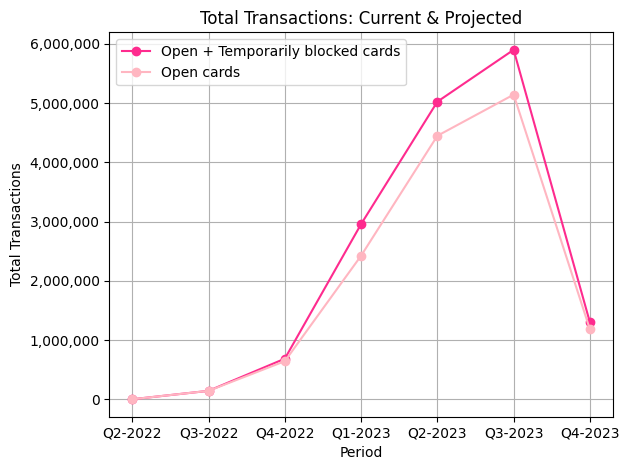

In [69]:
# first set of data
plt.plot(total_concat['period'], total_concat['total_transactions'], marker='o', color='#FE2B8E', label='Open + Temporarily blocked cards')

# second set of data
plt.plot(total_open['period'], total_open['total_transactions'], marker='o', color='#FFB6C1', label='Open cards')

# y axis
def format_func(value, tick_number):
    return f'{int(value):,}'  # Formats the number with commas

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

plt.xlabel('Period')
plt.ylabel('Total Transactions')
plt.title('Total Transactions: Current & Projected')

plt.legend()
# plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


### 3.3 Dealing with a large number of cards expiring in the next quarter

🤔 If a large number of cards are expiring in a given quarter (e.g. Q2-2024) the recommendations would be:

* Ensure that the reactivation process for card exchange is optimized;
* Work together with CRM to contact customers to make them aware of the card's expiry date;
* And monitor card revalidation;